In [138]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import numpy as np

def concat_csv_files_from_folders(folder_paths):
    # List to hold dataframes
    df_list = []

    # Loop through each folder
    for folder_path in folder_paths:
        # Loop through each file in the folder
        for file in os.listdir(folder_path):
            # Check if the file is a CSV
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path)
                df_list.append(df)

    # Concatenate all dataframes
    concatenated_df = pd.concat(df_list, ignore_index=True)

    return concatenated_df

shakir = '../psychopy_new/data/Shakir/'
sidd = '../psychopy_new/data/Sidd/' 
weronika = '../psychopy_new/data/'

In [139]:
concatenated_df = concat_csv_files_from_folders([shakir, sidd, weronika])
concatenated_df = concatenated_df[['key_resp_2.keys', 'key_resp_2.corr', 'type.routineEndVal', 'key_resp_2.rt', 'participant', 'session', 'date']]
concatenated_df = concatenated_df.rename(columns={'key_resp_2.keys': 'response', 'key_resp_2.corr': 'is_correct', 'type.routineEndVal': 'nback_type', 'key_resp_2.rt': 'rt'})

In [140]:
concatenated_df.to_csv('../combined_df_new.csv', index=False)

In [141]:
concatenated_df.head()

,response,is_correct,nback_type,rt,participant,session,date
0,NaN,1.0,1.0,NaN,200,brown,2023-11-18_15h27.51.073
1,['space'],1.0,1.0,[0.42141750000882894],200,brown,2023-11-18_15h27.51.073
2,NaN,1.0,1.0,NaN,200,brown,2023-11-18_15h27.51.073
3,['space'],1.0,1.0,[0.47623529203701764],200,brown,2023-11-18_15h27.51.073
4,NaN,1.0,1.0,NaN,200,brown,2023-11-18_15h27.51.073


In [142]:
# Grouping by 'participant' and 'session', then calculating the average response time
cleaned_rt_df = concatenated_df.dropna(subset=['rt'], inplace=False) #remove NaN
cleaned_rt_df['rt'] = cleaned_rt_df['rt'].apply(lambda x: ast.literal_eval(x))  #transform string to float list
cleaned_rt_df['rt'] = cleaned_rt_df['rt'].apply(lambda x: x[0])  #unpack rt from list
cleaned_rt_df = cleaned_rt_df.groupby(['participant', 'session'])['rt'].mean().reset_index() #calc mean
print(cleaned_rt_df)

    participant  session        rt
0           200    brown  0.597322
1           200     pink  0.663236
2           200  silence  0.689830
3           201    brown  0.575296
4           201     pink  0.626294
5           201  silence  0.691080
6           202    brown  0.631834
7           202     pink  0.658994
8           202  silence  0.706021
9           203    brown  0.548970
10          203     pink  0.480569
11          203  silence  0.561180
12          204    brown  0.764905
13          204     pink  0.806334
14          204  silence  0.713385
15          301    brown  0.583730
16          301     pink  0.542763
17          301  silence  0.556076
18          302    brown  0.656807
19          302     pink  0.668080
20          302  silence  0.670850
21          303    brown  0.657170
22          303     pink  0.639314
23          303  silence  0.655400
24          304    brown  0.580810
25          304     pink  0.587469
26          304  silence  0.494843
27          305    b

C:\Users\poczt\AppData\Local\Temp\ipykernel_15624\2216127668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_rt_df['rt'] = cleaned_rt_df['rt'].apply(lambda x: ast.literal_eval(x))  #transform string to float list
C:\Users\poczt\AppData\Local\Temp\ipykernel_15624\2216127668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_rt_df['rt'] = cleaned_rt_df['rt'].apply(lambda x: x[0])  #unpack rt from list


In [143]:
grouped = cleaned_rt_df.groupby('session')
session_dfs = {}
for session_name, session_data in grouped:
    session_dfs[session_name] = session_data

#create separate dataframes for each noise
brown_df = session_dfs['brown'].reset_index()
pink_df = session_dfs['pink'].reset_index()
silence_df = session_dfs['silence'].reset_index()

print(brown_df.head())
print(pink_df.head())
print(silence_df.head())

brown_df.to_csv('../brown_avg_rt.csv', index=False)
pink_df.to_csv('../pink_avg_rt.csv', index=False)
silence_df.to_csv('../silence_avg_rt.csv', index=False)
cleaned_rt_df.to_csv('../all_avg_rt.csv', index=False)

   index  participant session        rt
0      0          200   brown  0.597322
1      3          201   brown  0.575296
2      6          202   brown  0.631834
3      9          203   brown  0.548970
4     12          204   brown  0.764905
   index  participant session        rt
0      1          200    pink  0.663236
1      4          201    pink  0.626294
2      7          202    pink  0.658994
3     10          203    pink  0.480569
4     13          204    pink  0.806334
   index  participant  session        rt
0      2          200  silence  0.689830
1      5          201  silence  0.691080
2      8          202  silence  0.706021
3     11          203  silence  0.561180
4     14          204  silence  0.713385


In [144]:
# Grouping by 'participant' and 'session', then calculating the average correctness
cleaned_corr_df = concatenated_df
cleaned_corr_df = cleaned_corr_df.groupby(['participant', 'session'])['is_correct'].mean().reset_index() #calc mean
print(cleaned_corr_df)

    participant  session  is_correct
0           200    brown    0.989583
1           200     pink    0.895833
2           200  silence    0.906250
3           201    brown    0.989583
4           201     pink    0.958333
5           201  silence    0.937500
6           202    brown    0.979167
7           202     pink    0.958333
8           202  silence    1.000000
9           203    brown    0.979167
10          203     pink    1.000000
11          203  silence    0.927083
12          204    brown    0.979167
13          204     pink    1.000000
14          204  silence    0.968750
15          301    brown    0.968750
16          301     pink    0.968750
17          301  silence    0.979167
18          302    brown    0.937500
19          302     pink    0.968750
20          302  silence    0.979167
21          303    brown    0.947917
22          303     pink    0.968750
23          303  silence    0.947917
24          304    brown    0.989583
25          304     pink    0.989583
2

In [145]:
grouped_corr = cleaned_corr_df.groupby('session')
session_corr_dfs = {}
for session_name, session_data in grouped_corr:
    session_corr_dfs[session_name] = session_data

#create separate dataframes for each noise
brown_corr_df = session_corr_dfs['brown'].reset_index()
pink_corr_df = session_corr_dfs['pink'].reset_index()
silence_corr_df = session_corr_dfs['silence'].reset_index()

print(brown_corr_df.head())
print(pink_corr_df.head())
print(silence_corr_df.head())

brown_corr_df.to_csv('../brown_avg_corr.csv', index=False)
pink_corr_df.to_csv('../pink_avg_corr.csv', index=False)
silence_corr_df.to_csv('../silence_avg_corr.csv', index=False)
cleaned_corr_df.to_csv('../all_avg_corr.csv', index=False)

   index  participant session  is_correct
0      0          200   brown    0.989583
1      3          201   brown    0.989583
2      6          202   brown    0.979167
3      9          203   brown    0.979167
4     12          204   brown    0.979167
   index  participant session  is_correct
0      1          200    pink    0.895833
1      4          201    pink    0.958333
2      7          202    pink    0.958333
3     10          203    pink    1.000000
4     13          204    pink    1.000000
   index  participant  session  is_correct
0      2          200  silence    0.906250
1      5          201  silence    0.937500
2      8          202  silence    1.000000
3     11          203  silence    0.927083
4     14          204  silence    0.968750


In [146]:
type(brown_corr_df['participant'][0])

numpy.int64

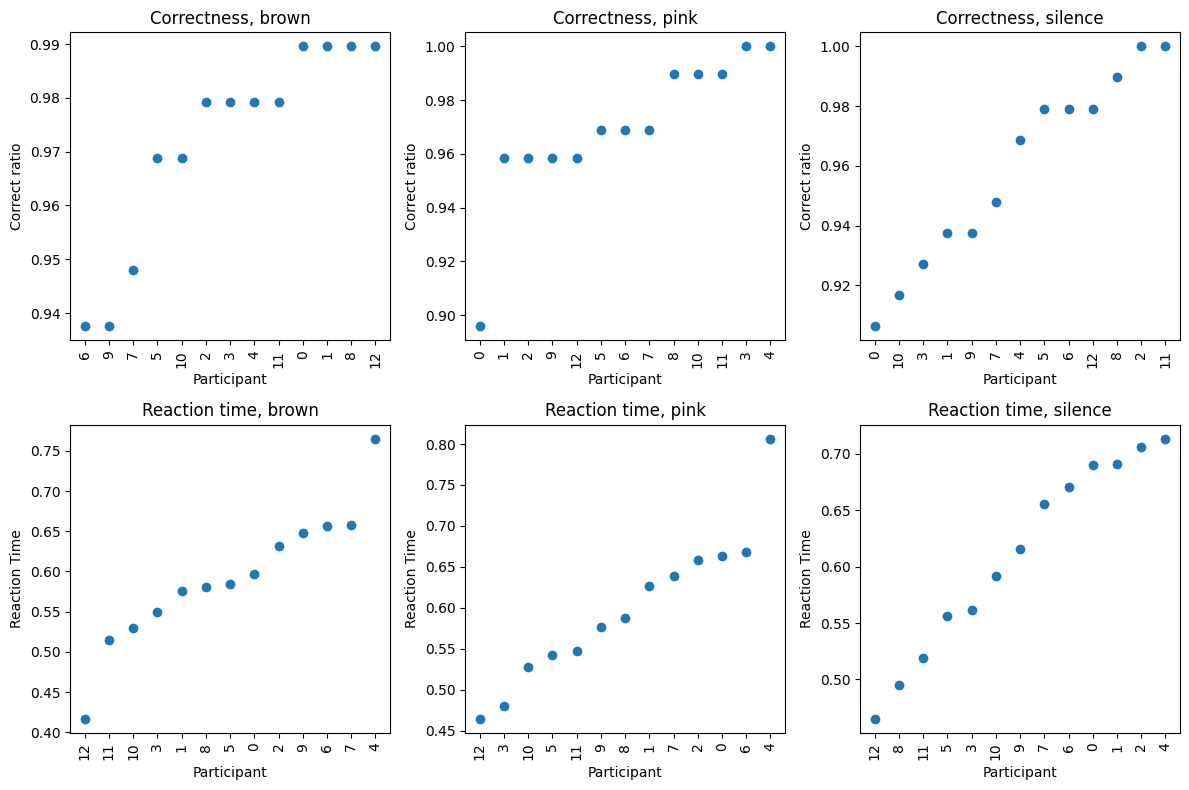

In [147]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# Scatter plots with titles
brown_corr_df = brown_corr_df.sort_values(by='is_correct', ascending=True)
axs[0, 0].scatter(brown_corr_df.index.astype(str), brown_corr_df['is_correct'])
axs[0, 0].set_title('Correctness, brown')
axs[0, 0].set_ylabel('Correct ratio')
axs[0, 0].set_xlabel('Participant')
axs[0, 0].tick_params(axis='x', rotation=90)

pink_corr_df = pink_corr_df.sort_values(by='is_correct', ascending=True)
axs[0, 1].scatter(pink_corr_df.index.astype(str), pink_corr_df['is_correct'])
axs[0, 1].set_title('Correctness, pink')
axs[0, 1].set_ylabel('Correct ratio')
axs[0, 1].set_xlabel('Participant')
axs[0, 1].tick_params(axis='x', rotation=90)

silence_corr_df = silence_corr_df.sort_values(by='is_correct', ascending=True)
axs[0, 2].scatter(silence_corr_df.index.astype(str), silence_corr_df['is_correct'])
axs[0, 2].set_title('Correctness, silence')
axs[0, 2].set_ylabel('Correct ratio')
axs[0, 2].set_xlabel('Participant')
axs[0, 2].tick_params(axis='x', rotation=90)

brown_df = brown_df.sort_values(by='rt', ascending=True)
axs[1, 0].scatter(brown_df.index.astype(str), brown_df['rt'])
axs[1, 0].set_title('Reaction time, brown')
axs[1, 0].set_ylabel('Reaction Time')
axs[1, 0].set_xlabel('Participant')
axs[1, 0].tick_params(axis='x', rotation=90)

pink_df = pink_df.sort_values(by='rt', ascending=True)
axs[1, 1].scatter(pink_df.index.astype(str), pink_df['rt'])
axs[1, 1].set_title('Reaction time, pink')
axs[1, 1].set_ylabel('Reaction Time')
axs[1, 1].set_xlabel('Participant')
axs[1, 1].tick_params(axis='x', rotation=90)

silence_df = silence_df.sort_values(by='rt', ascending=True)
axs[1, 2].scatter(silence_df.index.astype(str), silence_df['rt'])
axs[1, 2].set_title('Reaction time, silence')
axs[1, 2].set_ylabel('Reaction Time')
axs[1, 2].set_xlabel('Participant')
axs[1, 2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()